In [999]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics

%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [1000]:
#Read in the csv file and convert to a Pandas dataframe

In [1001]:
#Read in the csv file and convert to a Pandas dataframe

In [1002]:
# from google.colab import drive
# drive.mount('/content/drive')

In [1003]:
football = pd.read_csv("Data/final_data.csv")


### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [1004]:
football.shape

(10754, 22)

In [1005]:
football.columns

Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

In [1006]:
pd.set_option('display.max_columns', None)
football.head(1)

player               team          name  \
0  /david-de-gea/profil/spieler/59377  Manchester United  David de Gea   

     position  height   age  appearance  goals  assists  yellow cards  \
0  Goalkeeper   189.0  32.0         104    0.0      0.0      0.009585   

   second yellow cards  red cards  goals conceded  clean sheets  \
0                  0.0        0.0        1.217252      0.335463   

   minutes played  days_injured  games_injured  award  current_value  \
0            9390            42              5     13       15000000   

   highest_value  position_encoded  winger  
0       70000000                 1       0

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data.

In [1007]:
football.describe(include="object")


player                  team      name  \
count                                10754                 10754     10754   
unique                               10754                   374     10584   
top     /david-de-gea/profil/spieler/59377  Daejeon Hana Citizen  Paulinho   
freq                                     1                    46         6   

                    position  
count                  10754  
unique                    16  
top     Defender Centre-Back  
freq                    1821

In [1008]:
football.describe(include="integer")

appearance  minutes played  days_injured  games_injured  \
count  10754.000000    10754.000000  10754.000000   10754.000000   
mean      36.407011     2470.789381    117.961689      15.826297   
std       26.526541     2021.703271    175.206827      23.383606   
min        0.000000        0.000000      0.000000       0.000000   
25%       12.000000      660.000000      0.000000       0.000000   
50%       35.000000     2101.500000     37.000000       5.000000   
75%       59.000000     3968.000000    181.000000      24.000000   
max      107.000000     9510.000000   2349.000000     339.000000   

              award  current_value  highest_value  position_encoded  \
count  10754.000000   1.075400e+04   1.075400e+04      10754.000000   
mean       1.960759   3.622971e+06   6.152606e+06          2.713223   
std        3.743936   9.095410e+06   1.338988e+07          0.986356   
min        0.000000   0.000000e+00   0.000000e+00          1.000000   
25%        0.000000   3.000000e+05   4.500000e+05          2.000000   
50%        1.000000   8.000000e+05   1.500000e+06          3.000000   
75%        2.000000   3.000000e+06   5.000000e+06          4.000000   
max       92.000000   1.800000e+08   2.000000e+08          4.000000   

             winger  
count  10754.000000  
mean       0.307513  
std        0.461485  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        1.000000

In [1009]:
football.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

In [1010]:
football['position'].unique()

array(['Goalkeeper', 'Defender Centre-Back', 'Defender Left-Back',
       'Defender Right-Back', 'midfield-DefensiveMidfield',
       'midfield-CentralMidfield', 'midfield-AttackingMidfield',
       'Attack-LeftWinger', 'Attack-RightWinger', 'Attack Centre-Forward',
       'midfield-RightMidfield', 'midfield-LeftMidfield',
       'Attack-SecondStriker', 'midfield', 'Attack', 'Defender'],
      dtype=object)

In [1011]:
football[football['position']=="Defender Centre-Back"]

player  \
3             /lisandro-martinez/profil/spieler/480762   
4                /raphael-varane/profil/spieler/164770   
5                 /harry-maguire/profil/spieler/177907   
6               /victor-lindelof/profil/spieler/184573   
7                    /phil-jones/profil/spieler/117996   
8                   /teden-mengi/profil/spieler/548470   
34                 /nayef-aguerd/profil/spieler/361914   
35                   /kurt-zouma/profil/spieler/157509   
36                 /thilo-kehrer/profil/spieler/228948   
37                /angelo-ogbonna/profil/spieler/48002   
57                    /wout-faes/profil/spieler/292808   
58               /caglar-soyuncu/profil/spieler/320141   
59                /harry-souttar/profil/spieler/298091   
60               /daniel-amartey/profil/spieler/214056   
61            /jannik-vestergaard/profil/spieler/99331   
62                   /jonny-evans/profil/spieler/42412   
85                 /diego-carlos/profil/spieler/329145   
86                 /tyrone-mings/profil/spieler/253677   
87                   /ezri-konsa/profil/spieler/413403   
88               /calum-chambers/profil/spieler/215118   
107                  /max-kilman/profil/spieler/525247   
108              /nathan-collins/profil/spieler/469050   
109                /craig-dawson/profil/spieler/121477   
110                        /toti/profil/spieler/606718   
135         /armel-bella-kotchap/profil/spieler/467563   
136             /mohammed-salisu/profil/spieler/563963   
137             /duje-caleta-car/profil/spieler/238266   
138                /jan-bednarek/profil/spieler/243028   
139                      /lyanco/profil/spieler/379807   
165                /adam-webster/profil/spieler/212847   
166                  /lewis-dunk/profil/spieler/148153   
167                /levi-colwill/profil/spieler/614258   
168          /jan-paul-van-hecke/profil/spieler/576314   
190             /james-tarkowski/profil/spieler/173504   
191                 /conor-coady/profil/spieler/128901   
192                 /ben-godfrey/profil/spieler/343475   
193               /mason-holgate/profil/spieler/348623   
194                  /yerry-mina/profil/spieler/289446   
195               /michael-keane/profil/spieler/118534   
215             /moussa-niakhate/profil/spieler/291200   
216               /scott-mckenna/profil/spieler/255906   
217                 /joe-worrall/profil/spieler/415970   
218                  /willy-boly/profil/spieler/142310   
219                   /steve-cook/profil/spieler/90836   
220                      /felipe/profil/spieler/156501   
250                  /robin-koch/profil/spieler/328784   
251            /maximilian-wober/profil/spieler/263361   
252                  /liam-cooper/profil/spieler/75067   
274                  /marc-guehi/profil/spieler/392757   
275            /joachim-andersen/profil/spieler/260827   
276              /chris-richards/profil/spieler/578539   
277             /nathan-ferguson/profil/spieler/507254   
278                /james-tomkins/profil/spieler/61592   
298                   /issa-diop/profil/spieler/272622   
299            /tosin-adarabioyo/profil/spieler/258878   
300                 /shane-duffy/profil/spieler/119269   
301                    /tim-ream/profil/spieler/145466   
323               /ilya-zabarnyi/profil/spieler/659089   
324               /marcos-senesi/profil/spieler/469781   
325                 /lloyd-kelly/profil/spieler/480116   
326                /chris-mepham/profil/spieler/480987   
327               /jack-stephens/profil/spieler/163744   
350             /kristoffer-ajer/profil/spieler/328658   
351               /ethan-pinnock/profil/spieler/442248   
352              /pontus-jansson/profil/spieler/125314   
353                      /ben-mee/profil/spieler/74810   
354                        /zanka/profil/spieler/52059   
375             /virgil-van-dijk/profil/spieler/139208   
376             /ibrahima-konate/profil/spiele

The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable.


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [1012]:
# The dataset was sourced from Kaggle Football Players' Transfer Fee Prediction Dataset (https://www.kaggle.com/datasets/khanghunhnguyntrng/football-players-transfer-fee-prediction-dataset/data)

#### 2. Timeliness:
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [1013]:
# A dataset of football players was collected for the 2021-2022 and 2022-2023 seasons.

#### 3. Consistency:

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [1014]:
# The use of a single dataset guarantees consistency from the outset

#### 4. Relevance:
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [1015]:
# 1. Sample Appropriateness: "Based on the data characteristics, the sample is appropriate for this analysis."
# 2. Variable Selection: "The needed variables are relevant to the analysis.

In [1016]:
football.head(3)

player               team          name  \
0   /david-de-gea/profil/spieler/59377  Manchester United  David de Gea   
1  /jack-butland/profil/spieler/128899  Manchester United  Jack Butland   
2     /tom-heaton/profil/spieler/34130  Manchester United    Tom Heaton   

     position  height   age  appearance  goals  assists  yellow cards  \
0  Goalkeeper   189.0  32.0         104    0.0      0.0      0.009585   
1  Goalkeeper   196.0  30.0          15    0.0      0.0      0.069018   
2  Goalkeeper   188.0  37.0           4    0.0      0.0      0.000000   

   second yellow cards  red cards  goals conceded  clean sheets  \
0                  0.0        0.0        1.217252      0.335463   
1                  0.0        0.0        1.242331      0.207055   
2                  0.0        0.0        0.616438      0.924658   

   minutes played  days_injured  games_injured  award  current_value  \
0            9390            42              5     13       15000000   
1            1304           510             58      1        1500000   
2             292           697             84      4         600000   

   highest_value  position_encoded  winger  
0       70000000                 1       0  
1       22000000                 1       0  
2        6000000                 1       0

In [1017]:
# the link to the Transfermarkt page contains player data. Please add a prefix "www.transfermarkt.com
football['player'].unique()

array(['/david-de-gea/profil/spieler/59377',
       '/jack-butland/profil/spieler/128899',
       '/tom-heaton/profil/spieler/34130', ...,
       '/nathanael-blair/profil/spieler/1023268',
       '/zachary-sapsford/profil/spieler/703657',
       '/alexander-badolato/profil/spieler/957230'], dtype=object)

#### 5. Uniqueness:
Check for and remove duplicate records to prevent skewed analysis results.


In [1018]:
# check if there is duplicated rows in dataset
football[football.duplicated(keep= False)]

Empty DataFrame
Columns: [player, team, name, position, height, age, appearance, goals, assists, yellow cards, second yellow cards, red cards, goals conceded, clean sheets, minutes played, days_injured, games_injured, award, current_value, highest_value, position_encoded, winger]
Index: []

In [1019]:
# I noticed that some name players are duplicated in the dataset with differences in columns values
# because there is players with same name
football[football['name'].duplicated(keep=False)].sort_values(by='name')

player  \
2206           /aaron-ramsey/profil/spieler/50057   
5597          /aaron-ramsey/profil/spieler/646658   
9104    /abdulaziz-majrashi/profil/spieler/444714   
9079    /abdulaziz-majrashi/profil/spieler/500321   
9295    /abdullah-al-yousef/profil/spieler/478535   
9256    /abdullah-al-yousef/profil/spieler/180926   
10732          /adama-traore/profil/spieler/70209   
5249          /adama-traore/profil/spieler/262608   
126           /adama-traore/profil/spieler/204103   
3374                /adriel/profil/spieler/808445   
6428                /adriel/profil/spieler/494832   
7919       /adrian-martinez/profil/spieler/598769   
9096       /adrian-martinez/profil/spieler/312082   
3308                   /alan/profil/spieler/73460   
8428                  /alan/profil/spieler/515639   
3640           /alan-franco/profil/spieler/503343   
8053           /alan-franco/profil/spieler/400960   
4652        /alan-rodriguez/profil/spieler/353263   
8112        /alan-rodriguez/profil/spieler/465817   
7711        /alan-rodriguez/profil/spieler/491592   
372                /alisson/profil/spieler/105470   
3667               /alisson/profil/spieler/229736   
3292                 /andre/profil/spieler/800176   
3353                 /andre/profil/spieler/959171   
3407                /andre/profil/spieler/1024605   
2558           /andre-gomes/profil/spieler/221025   
4281           /andre-gomes/profil/spieler/670710   
3881           /andre-silva/profil/spieler/565232   
1052           /andre-silva/profil/spieler/198008   
1316       /antonio-sanchez/profil/spieler/513031   
4589       /antonio-sanchez/profil/spieler/833271   
4110                /antony/profil/spieler/798687   
27                  /antony/profil/spieler/602105   
3732                 /artur/profil/spieler/440658   
7189                 /artur/profil/spieler/435488   
10721             /bernardo/profil/spieler/883217   
6656              /bernardo/profil/spieler/364258   
3992              /bruninho/profil/spieler/555752   
3193              /bruninho/profil/spieler/668234   
9337        /bruno-henrique/profil/spieler/277335   
3762        /bruno-henrique/profil/spieler/353108   
3498       /bruno-rodrigues/profil/spieler/406766   
6223       /bruno-rodrigues/profil/spieler/657386   
2780           /burak-yilmaz/profil/spieler/34987   
6206          /burak-yilmaz/profil/spieler/291927   
3635                 /cadu/profil/spieler/1083073   
3221                  /cadu/profil/spieler/687678   
4295             /chiquinho/profil/spieler/334557   
123              /chiquinho/profil/spieler/695454   
5170             /claudinho/profil/spieler/403315   
3496             /claudinho/profil/spieler/792249   
1106          /claudio-bravo/profil/spieler/40423   
6914         /claudio-bravo/profil/spieler/441408   
3173               /cleiton/profil/spieler/468247   
3746               /cleiton/profil/spieler/943237   
3905              /costinha/profil/spieler/236886   
4150              /costinha/profil/spieler/539252   
7321                /daniel/profil/spieler/530421   
3359                /daniel/profil/spieler/418530   
2090                /danilo/profil/spieler/145707   
3141                /danilo/profil/spieler/519731   
227                 /danilo/profil/spieler/808509   
54              /danny-ward/profil/spieler/203026   
5520            /danny-ward/profil/spieler/124172   
4674           /david-ayala/profil/spieler/920611   
6919           /david-ayala/profil/spieler/661094   
3521                 /diego/profil/spieler/548846   
8521                 /diego/profil/spieler/376155   
3639           /diego-costa/profil/spieler/546212   
131             /diego-costa/profil/spieler/44779   
1408        /diego-gonzalez/profil/spieler/349836   
8230         /diego-gonzalez/profil/spieler/54578   
3616                  /dodo/profil/spieler/109038   
1613                  /dodo/profil/spieler/401529   
3454                  /dudu/profil/spieler/476362   
860            

In [1020]:
# The player link is unique, making it a key that should not be duplicated
football[football['player'].duplicated(keep=False)].sort_values(by='player')

Empty DataFrame
Columns: [player, team, name, position, height, age, appearance, goals, assists, yellow cards, second yellow cards, red cards, goals conceded, clean sheets, minutes played, days_injured, games_injured, award, current_value, highest_value, position_encoded, winger]
Index: []

In [1021]:
# go to delete duplicates columns

#### 6. Completeness:
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [1022]:
#Display number missing values per column

In [1023]:
# check if there any missing values per column
football.isnull().sum().sort_values(ascending = False)

player                 0
team                   0
position_encoded       0
highest_value          0
current_value          0
award                  0
games_injured          0
days_injured           0
minutes played         0
clean sheets           0
goals conceded         0
red cards              0
second yellow cards    0
yellow cards           0
assists                0
goals                  0
appearance             0
age                    0
height                 0
position               0
name                   0
winger                 0
dtype: int64

In [1024]:
# go to clean them

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [1025]:
football.head(1)

player               team          name  \
0  /david-de-gea/profil/spieler/59377  Manchester United  David de Gea   

     position  height   age  appearance  goals  assists  yellow cards  \
0  Goalkeeper   189.0  32.0         104    0.0      0.0      0.009585   

   second yellow cards  red cards  goals conceded  clean sheets  \
0                  0.0        0.0        1.217252      0.335463   

   minutes played  days_injured  games_injured  award  current_value  \
0            9390            42              5     13       15000000   

   highest_value  position_encoded  winger  
0       70000000                 1       0

In [1026]:
football.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

In [1027]:
football.dtypes

player                  object
team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [1028]:
categorical_features = ['team', 'position']
numeric_features = ['height', 'age', 'appearance',"goals" ,"assists" ,"yellow cards","second yellow cards","red cards","goals conceded","clean sheets" ,"minutes played" , "days_injured" ,"games_injured","award","current_value" , "highest_value" ,"position_encoded" ,"winger"]

In [1029]:
for i in categorical_features:
   print (football[i].value_counts())

team
Daejeon Hana Citizen                   46
Jeonbuk Hyundai Motors                 46
FC Seoul                               45
Gangwon FC                             43
Daegu FC                               42
Al-Batin FC                            41
Santos FC                              40
Swallows FC                            40
Sagan Tosu                             40
Royal AM FC                            40
Marumo Gallants FC                     39
Vissel Kobe                            39
Botafogo de Futebol e Regatas          38
Incheon United                         38
Suwon Samsung Bluewings                38
Mamelodi Sundowns FC                   38
São Paulo Futebol Clube                37
Kashiwa Reysol                         37
Yokohama FC                            37
FC Tokyo                               37
Kyoto Sanga                            37
Cerezo Osaka                           37
Yokohama F. Marinos                    37
Al-Taawoun FC                

In [1030]:
football_model = football.copy()

In [1031]:
football_model.drop(columns=["name","player"],inplace=True)

In [1032]:
print("Categorical features: ", categorical_features)
print("Numerical features: ", numeric_features)

Categorical features:  ['team', 'position']
Numerical features:  ['height', 'age', 'appearance', 'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards', 'goals conceded', 'clean sheets', 'minutes played', 'days_injured', 'games_injured', 'award', 'current_value', 'highest_value', 'position_encoded', 'winger']


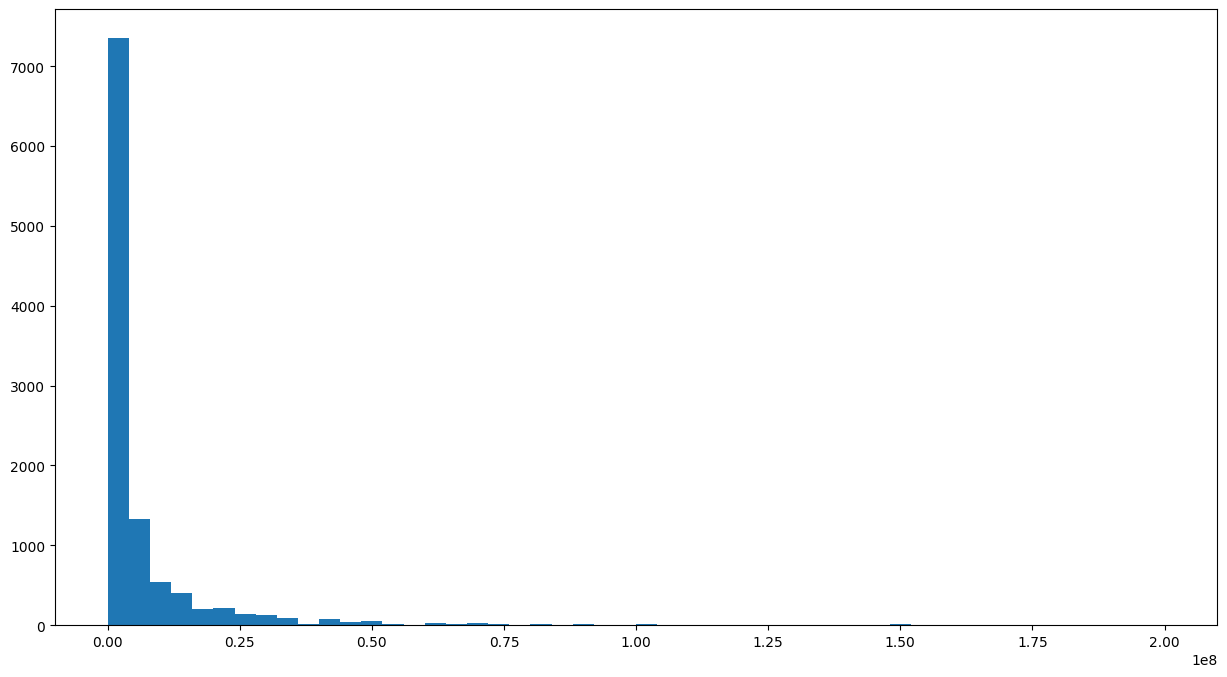

In [1033]:
plt.figure(figsize=(15,8))
plt.hist(football_model['highest_value'], bins=50);
plt.show()

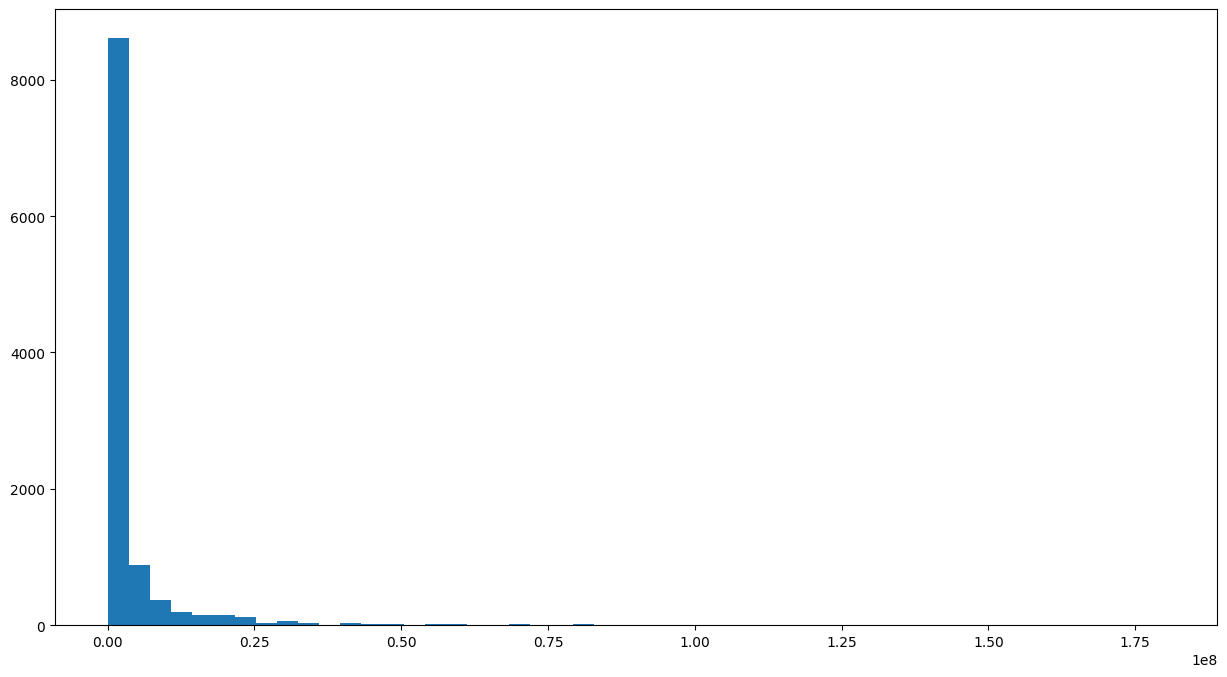

In [1034]:
plt.figure(figsize=(15,8))
plt.hist(football_model['current_value'], bins=50);
plt.show()

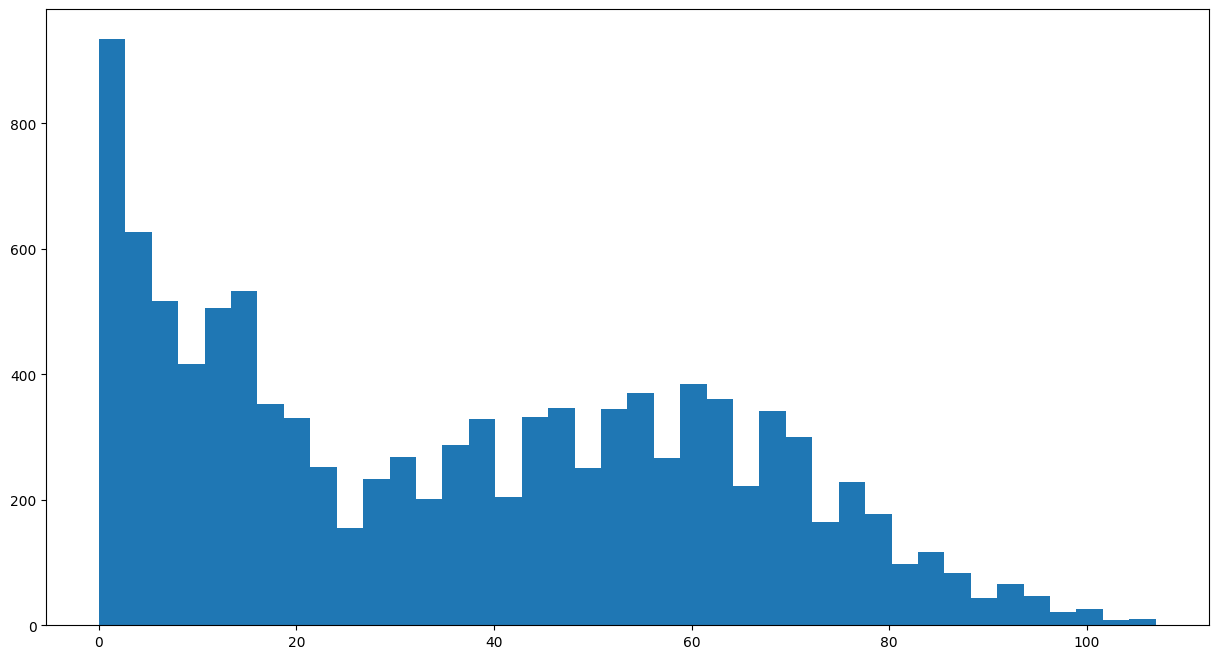

In [1035]:
plt.figure(figsize=(15,8))
plt.hist(football_model['appearance'], bins=40);
plt.show()

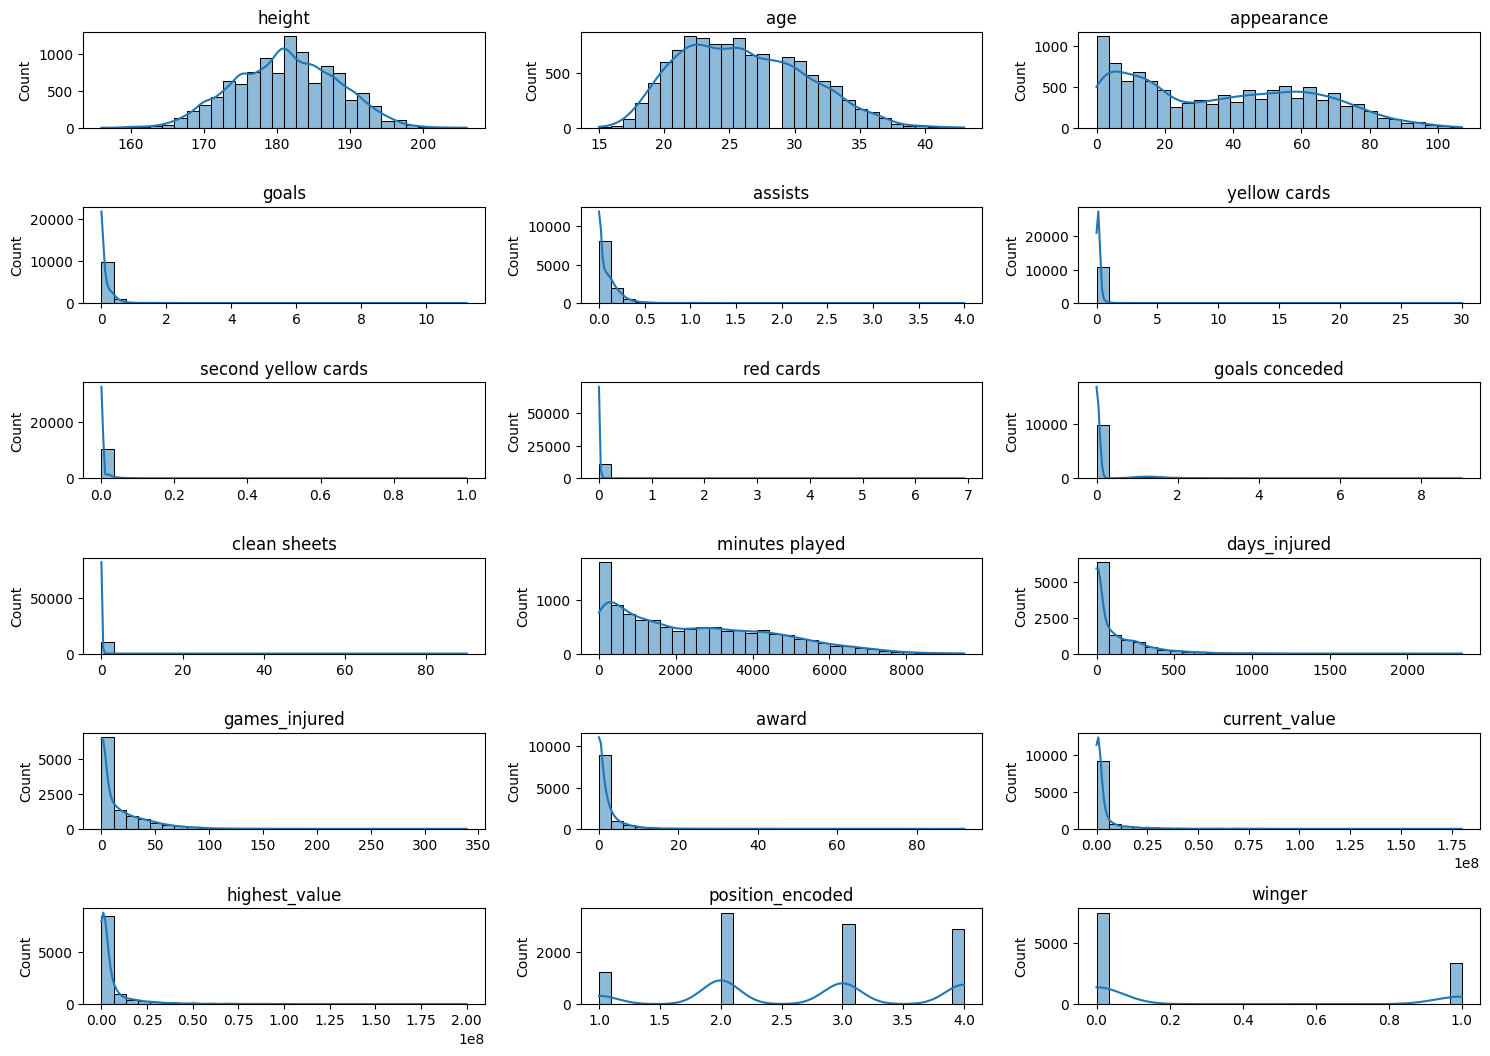

In [1036]:
plt.figure(figsize=(15, 12))


num_features = len(numeric_features)
rows = (num_features // 3) + 1
cols = 3

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(football[feature].dropna(), bins=30, kde=True)
    plt.title(feature)
    plt.xlabel("")

plt.tight_layout()
plt.show()

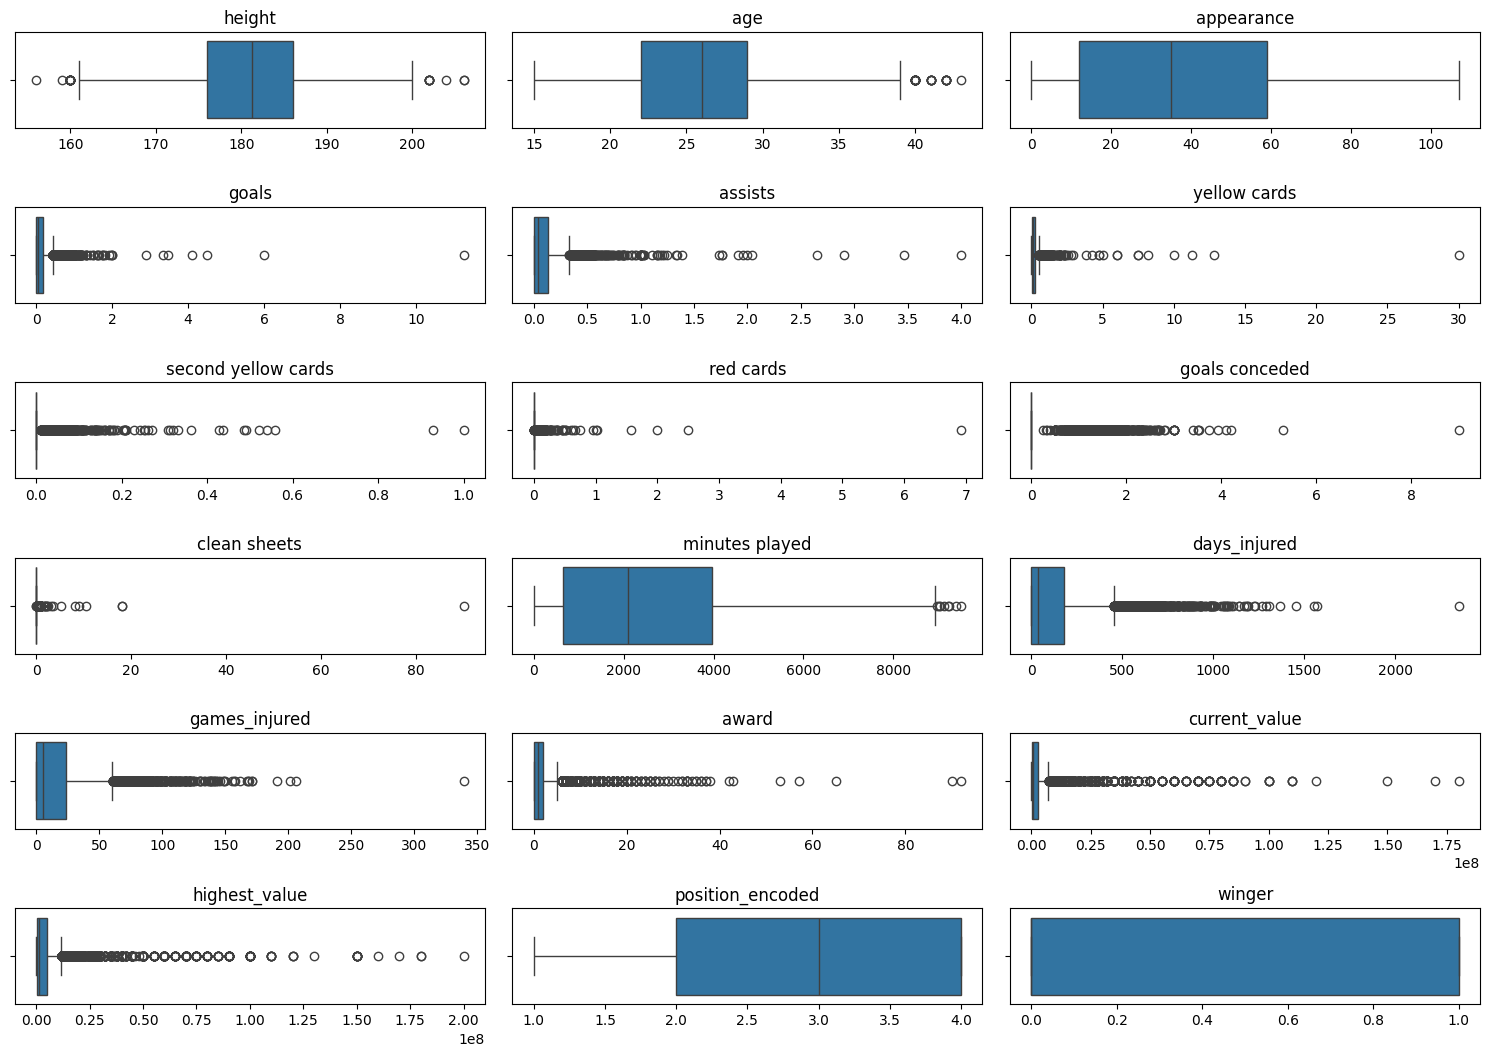

In [1037]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(15, 12))


num_features = len(numeric_features)
rows = (num_features // 3) + 1
cols = 3

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(x=football[feature])
    plt.title(feature)
    plt.xlabel("")

plt.tight_layout()
plt.show()


In [1038]:
# Height & Age normally distributed with some expected outliers
# Minutes Played & Appearances the distribution reflects natural variations between starting players and substitutes
# Goals, Assists, Clean Sheets noticeable outliers, but expected since only a few players achieve exceptional stats
# Yellow & Red Cards some players have an unusually high number of cards
# Days Injured, Games Injured  some players have extremely long injury periods which could exceptional cases
# Current & Highest Value extreme values may result from market fluctuations

In [1039]:
def plot_outliers(feature, threshold=0):
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=football[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()


    if feature not in football.columns:
        print(f"⚠️ Feature '{feature}' not found in dataset.")
        return


    outliers = football[football[feature] > threshold]
    print(f'\nTop {feature} Outliers:')
    print(outliers[['player', 'team', feature]].sort_values(by=feature, ascending=False))


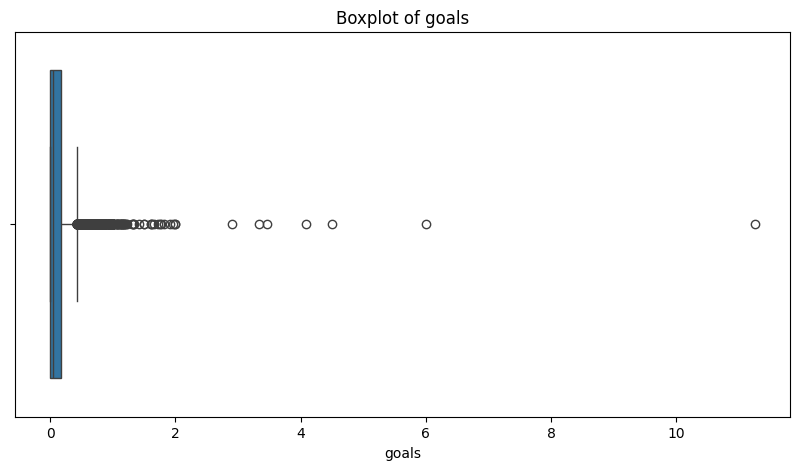


Top goals Outliers:
                                      player                             team  \
9239  /rakan-al-dosari/profil/spieler/998314                      Al-Raed SFC   
3799     /junior-moraes/profil/spieler/52915  Sport Club Corinthians Paulista   

      goals  
9239  11.25  
3799   6.00  


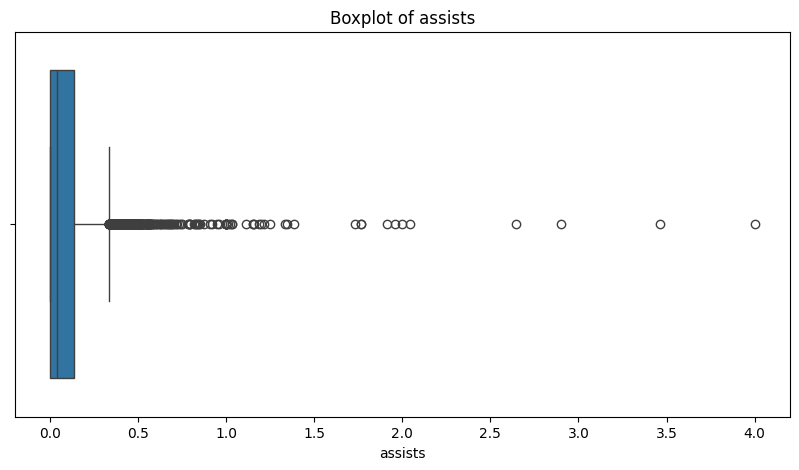


Top assists Outliers:
                                      player          team   assists
8387    /riki-harakawa/profil/spieler/212115  Cerezo Osaka  4.000000
6180  /denis-kovacevic/profil/spieler/672248  Istanbulspor  3.461538


In [1040]:
plot_outliers('goals', 5)
plot_outliers('assists', 3)

In [1041]:
#The results are natural because only a small percentage of players score or assist goals frequently.

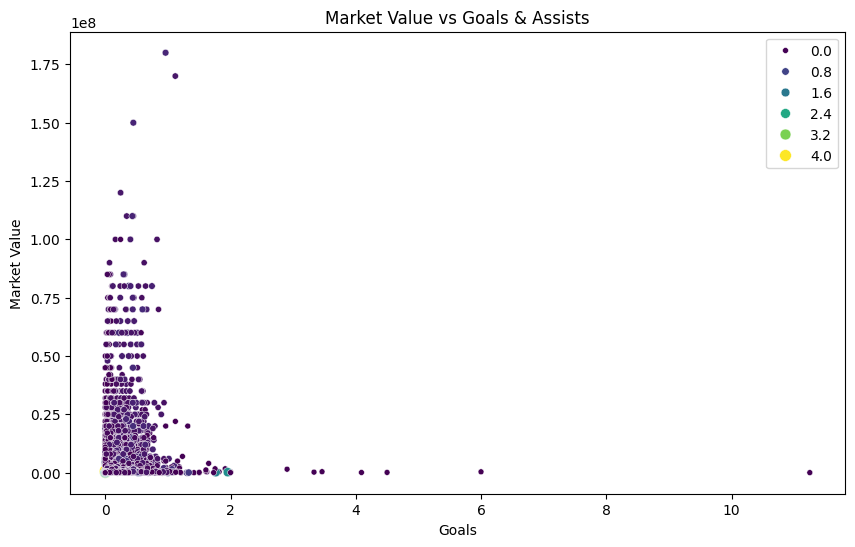

In [1042]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=football, x='goals', y='current_value', hue='assists', size='assists', palette='viridis')
plt.title('Market Value vs Goals & Assists')
plt.xlabel('Goals')
plt.ylabel('Market Value')
plt.legend()
plt.show()

In [1043]:
# Scoring goals is not the only factor influencing a player's market value, as we can see players with high market value despite scoring only a few goals

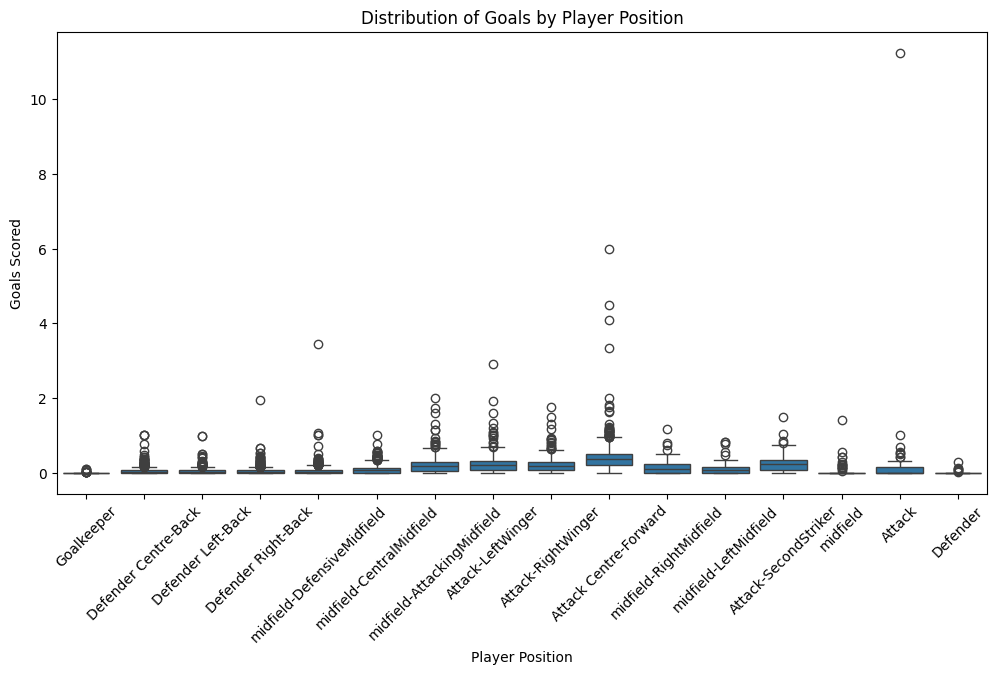

In [1044]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
sns.boxplot(x=football['position'], y=football['goals'])
plt.xlabel("Player Position")
plt.ylabel("Goals Scored")
plt.title("Distribution of Goals by Player Position")
plt.xticks(rotation=45)
plt.show()


In [1045]:
avg_goals_by_position = football.groupby('position')['goals'].mean().sort_values(ascending=False)
print(avg_goals_by_position)


position
Attack Centre-Forward         0.377764
Attack                        0.321874
Attack-SecondStriker          0.273625
Attack-LeftWinger             0.225207
Attack-RightWinger            0.205473
midfield-AttackingMidfield    0.196806
midfield-RightMidfield        0.147148
midfield-LeftMidfield         0.114886
midfield-CentralMidfield      0.093751
midfield                      0.062398
midfield-DefensiveMidfield    0.056701
Defender Right-Back           0.045821
Defender Left-Back            0.043998
Defender Centre-Back          0.043040
Defender                      0.022536
Goalkeeper                    0.000411
Name: goals, dtype: float64


In [1046]:
top_valued_players = football[[ "name" ,'team', 'current_value', 'highest_value', 'goals', 'assists']].sort_values(by='current_value', ascending=False).head(10)
print("Top 10 Most Valuable Players:")
print(top_valued_players)

Top 10 Most Valuable Players:
                   name                 team  current_value  highest_value  \
2644      Kylian Mbappé  Paris Saint-Germain      180000000      200000000   
453      Erling Haaland      Manchester City      170000000      170000000   
1521    Vinicius Junior          Real Madrid      150000000      150000000   
960     Jude Bellingham    Borussia Dortmund      120000000      120000000   
450          Phil Foden      Manchester City      110000000      110000000   
1017      Jamal Musiala        Bayern Munich      110000000      110000000   
474         Bukayo Saka           Arsenal FC      110000000      110000000   
1516  Federico Valverde          Real Madrid      100000000      100000000   
1523            Rodrygo          Real Madrid      100000000      100000000   
2023     Victor Osimhen           SSC Napoli      100000000      100000000   

         goals   assists  
2644  0.963082  0.433387  
453   1.118270  0.234699  
1521  0.448356  0.408502  
960

## 2. Data Cleaning:

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



In [1047]:
def show_categories(df):
    for i, col in enumerate(df.select_dtypes(include=['object']).columns, start=1):
        print(f"{i}. {col} :\t {df[col].unique()}\n")



In [1048]:
show_categories(football)

1. player :	 ['/david-de-gea/profil/spieler/59377'
 '/jack-butland/profil/spieler/128899' '/tom-heaton/profil/spieler/34130'
 ... '/nathanael-blair/profil/spieler/1023268'
 '/zachary-sapsford/profil/spieler/703657'
 '/alexander-badolato/profil/spieler/957230']

2. team :	 ['Manchester United' 'West Ham United' 'Leicester City' 'Aston Villa'
 'Wolverhampton Wanderers' 'Southampton FC' 'Brighton &amp; Hove Albion'
 'Everton FC' 'Nottingham Forest' 'Leeds United' 'Crystal Palace'
 'Fulham FC' 'AFC Bournemouth' 'Brentford FC' 'Liverpool FC'
 'Newcastle United' 'Manchester City' 'Arsenal FC' 'Tottenham Hotspur'
 'Chelsea FC' 'Borussia Mönchengladbach' 'VfL Wolfsburg'
 'TSG 1899 Hoffenheim' '1.FC Union Berlin' 'FC Augsburg' 'VfB Stuttgart'
 '1.FSV Mainz 05' '1.FC Köln' 'Hertha BSC' 'FC Schalke 04' 'VfL Bochum'
 'SV Werder Bremen' 'Eintracht Frankfurt' 'SC Freiburg'
 'Borussia Dortmund' 'Bayer 04 Leverkusen' 'Bayern Munich' 'RB Leipzig'
 'Real Sociedad' 'Villarreal CF' 'Real Betis Balompié' '

### Handling missing values:

In [1049]:
# Dataset already clened

### Correcting errors

-------------------

In [1050]:
# there is no erorr

### Dealing with outliers:

In [1051]:
#  There is no need to remove any outliers
#  The high market values of top players are expected, and the variation in goals and assists is natural since only a few players consistently score or assist at high rates.
#  Removing outliers might lead to the loss of valuable insights.

## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

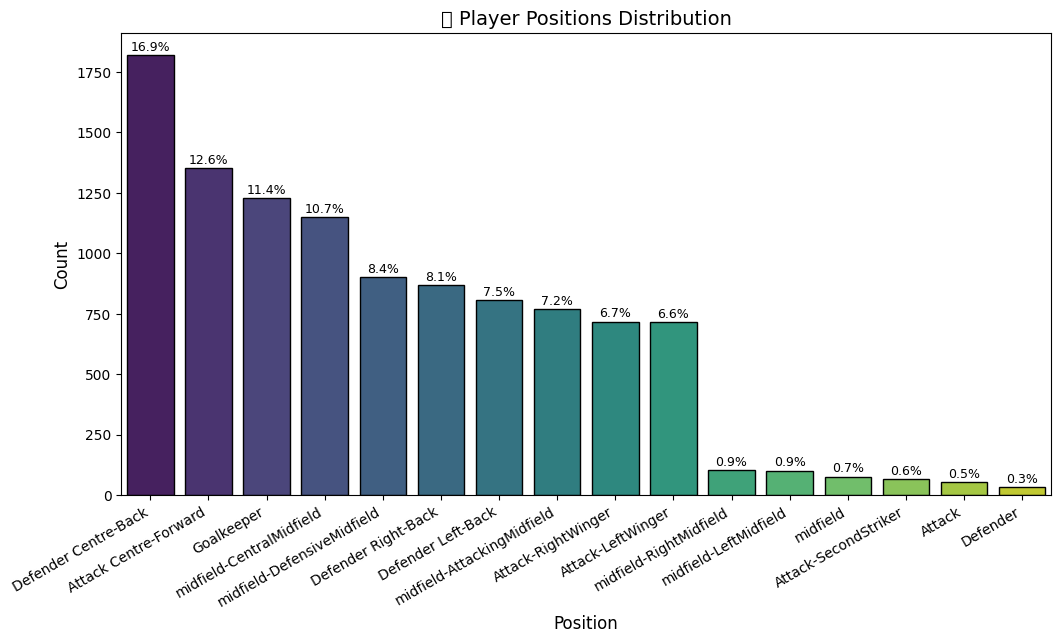

In [1052]:
# Set figure size for better visualization
plt.figure(figsize=(12, 6))
position_counts = football["position"].value_counts()

# Create the bar chart
sns.barplot(x=position_counts.index, y=position_counts.values, order=position_counts.index, palette="viridis", edgecolor="black")
plt.xlabel("Position", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("🔹 Player Positions Distribution", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Add percentage labels above bars
for i, v in enumerate(position_counts.values):
    plt.text(i, v + 20, f"{(v / football.shape[0]) * 100:.1f}%", ha='center', fontsize=9, color="black")

# Show the plot
plt.show()



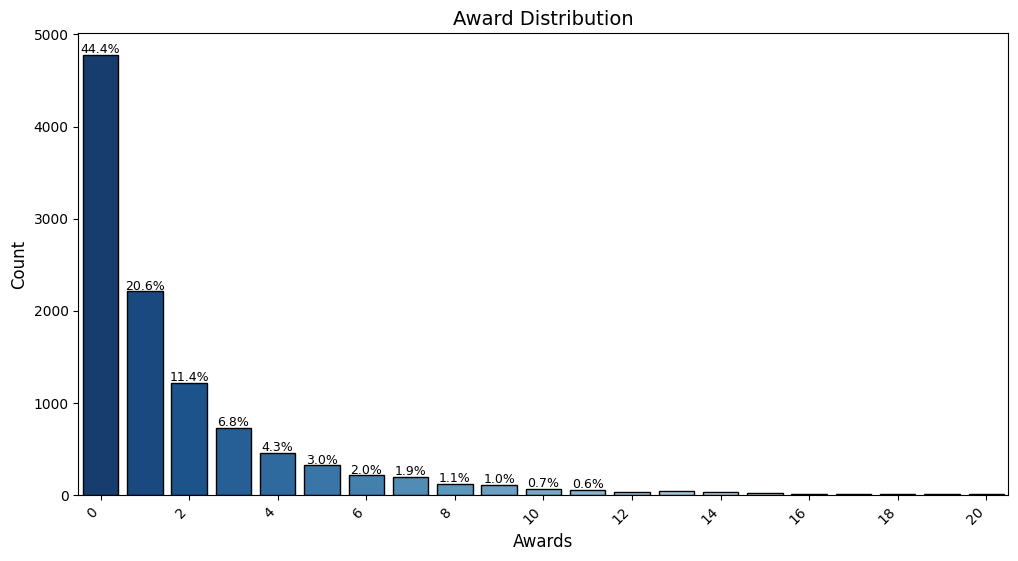

In [1053]:
# Set figure size
plt.figure(figsize=(12, 6))

# Get award counts
award_counts = football["award"].value_counts().sort_index()

# Limit x-axis to a reasonable range (e.g., first 20 awards)
max_award_to_show = 20  # Adjust if needed
filtered_award_counts = award_counts[award_counts.index <= max_award_to_show]

# Create the bar chart
sns.barplot(x=filtered_award_counts.index, y=filtered_award_counts.values, palette="Blues_r", edgecolor="black")
plt.xlabel("Awards", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Award Distribution", fontsize=14)

# Adjust x-axis labels (show every 2nd or 5th label to avoid clutter)
plt.xticks(ticks=filtered_award_counts.index[::2], labels=filtered_award_counts.index[::2], rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Add percentage labels above bars
for i, v in enumerate(filtered_award_counts.values):
    if v > 50:  # Display only for significant values to avoid clutter
        plt.text(i, v + 20, f"{(v / football.shape[0]) * 100:.1f}%", ha='center', fontsize=9, color="black")

# Show the plot
plt.show()



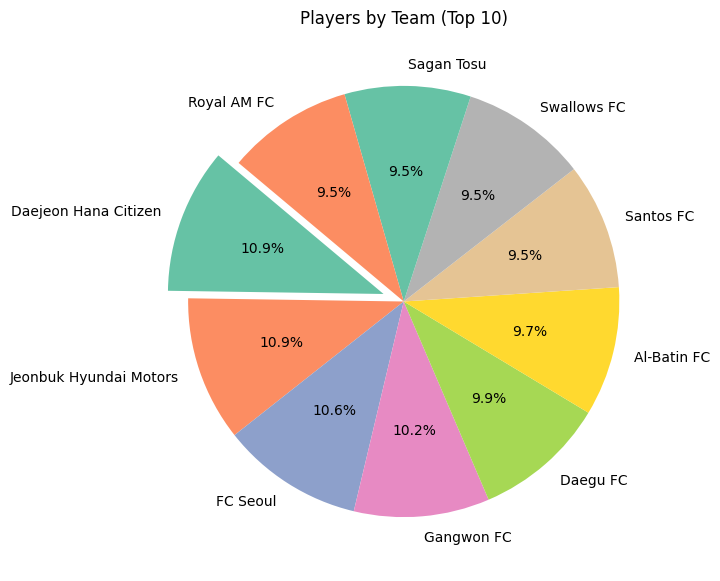

In [1054]:
plt.figure(figsize=(7, 7))
top_teams = football["team"].value_counts().nlargest(10)
explode = [0.1] + [0] * 9  # Explode only the first slice for emphasis
plt.pie(top_teams, labels=top_teams.index, autopct="%1.1f%%", colors=sns.color_palette("Set2", len(top_teams)), startangle=140, explode=explode)
plt.title("Players by Team (Top 10)")
plt.show()


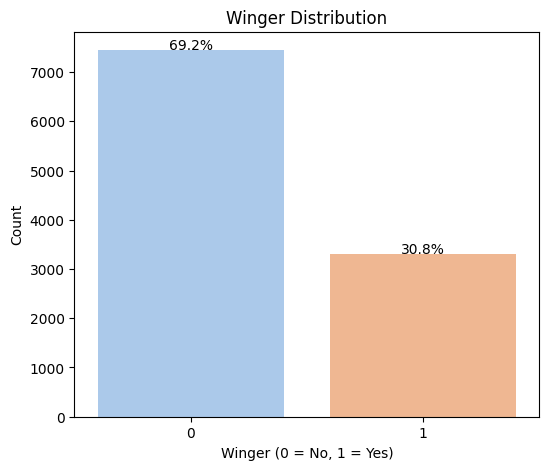

In [1055]:
plt.figure(figsize=(6, 5))
winger_counts = football["winger"].value_counts()
sns.barplot(x=winger_counts.index, y=winger_counts.values, palette="pastel")
plt.xlabel("Winger (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.title("Winger Distribution")

# Add percentage labels
for i, v in enumerate(winger_counts.values):
    plt.text(i, v + 5, f"{(v / football.shape[0]) * 100:.1f}%", ha='center')

plt.show()


#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

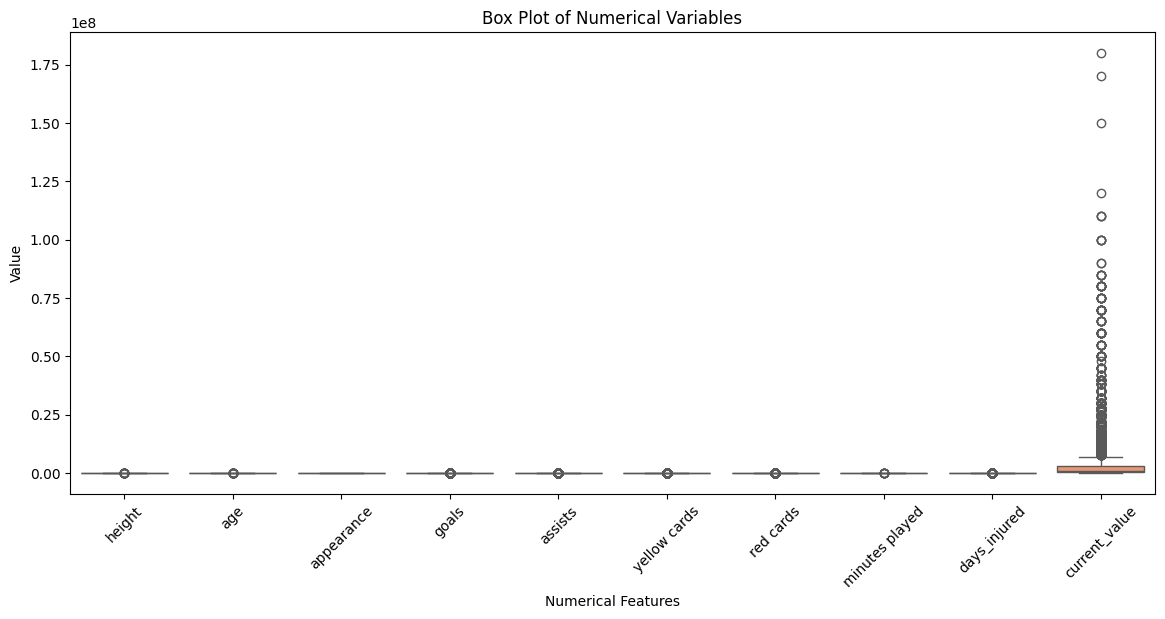

In [1056]:
# Define numerical columns
numerical_columns = ["height", "age", "appearance", "goals", "assists",
                     "yellow cards", "red cards", "minutes played",
                     "days_injured", "current_value"]

# Set figure size
plt.figure(figsize=(14, 6))

# Create Box Plot
sns.boxplot(data=football[numerical_columns], palette="Set2")
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.title("Box Plot of Numerical Variables")
plt.ylabel("Value")
plt.xlabel("Numerical Features")

# Show plot
plt.show()


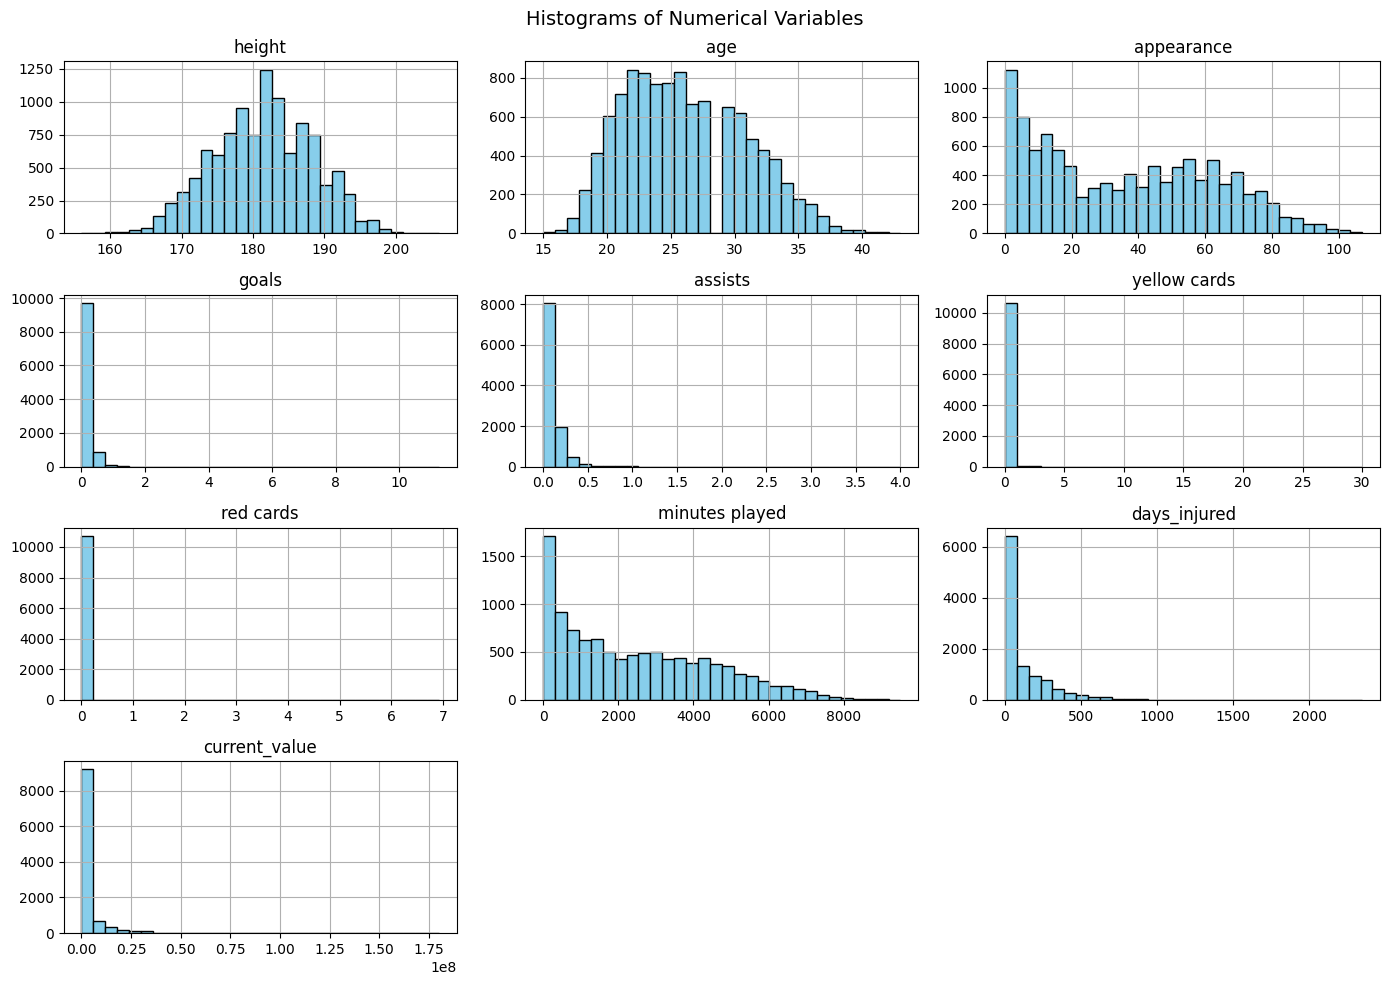

In [1057]:
# Set figure size
football[numerical_columns].hist(figsize=(14, 10), bins=30, color="skyblue", edgecolor="black")

# Adjust layout for better spacing
plt.suptitle("Histograms of Numerical Variables", fontsize=14)
plt.tight_layout()

# Show plot
plt.show()


### 2. Univariate Non-Graphical analysis:

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

In [1058]:

numeric_columns = football.select_dtypes(include=['float64', 'int64'])


statistics = pd.DataFrame({
    'Mean': numeric_columns.mean(),
    'Median': numeric_columns.median(),
    'Mode': numeric_columns.mode().iloc[0],
    'Range': numeric_columns.max() - numeric_columns.min(),
    'Std Dev': numeric_columns.std(),
    'Variance': numeric_columns.var(),
    'Skewness': numeric_columns.skew(),
})


print(statistics)


                             Mean        Median       Mode         Range  \
height               1.812404e+02  1.812404e+02      180.0  5.000000e+01   
age                  2.604190e+01  2.600000e+01       22.0  2.800000e+01   
appearance           3.640701e+01  3.500000e+01        0.0  1.070000e+02   
goals                1.255543e-01  4.596918e-02        0.0  1.125000e+01   
assists              8.697765e-02  4.077323e-02        0.0  4.000000e+00   
yellow cards         1.897572e-01  1.502504e-01        0.0  3.000000e+01   
second yellow cards  4.665667e-03  0.000000e+00        0.0  1.000000e+00   
red cards            6.826070e-03  0.000000e+00        0.0  6.923077e+00   
goals conceded       1.316555e-01  0.000000e+00        0.0  9.000000e+00   
clean sheets         4.488090e-02  0.000000e+00        0.0  9.000000e+01   
minutes played       2.470789e+03  2.101500e+03        0.0  9.510000e+03   
days_injured         1.179617e+02  3.700000e+01        0.0  2.349000e+03   
games_injure

In [1059]:
### Key Insights from the Data:
# - Player Age: Avg 26.04 years, typical for professional players.
# - Height: Avg 181.24 cm, standard for footballers.
# - Minutes Played: High variance (Std Dev = 2021.70), big gap between starters and reserves.
# - Goals & Assists: Highly skewed (Skewness = 14.26, 7.35), few top scorers, most players contribute little.
# - Red Cards: Extremely skewed (Skewness = 63.31), most players have none, a few get many.
# - Injuries: Large variation (Range = 2349 days), some rarely injured, others miss seasons.
# - Clean Sheets: Highly skewed (Skewness = 87.39), only a few goalkeepers have many.

## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart|


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

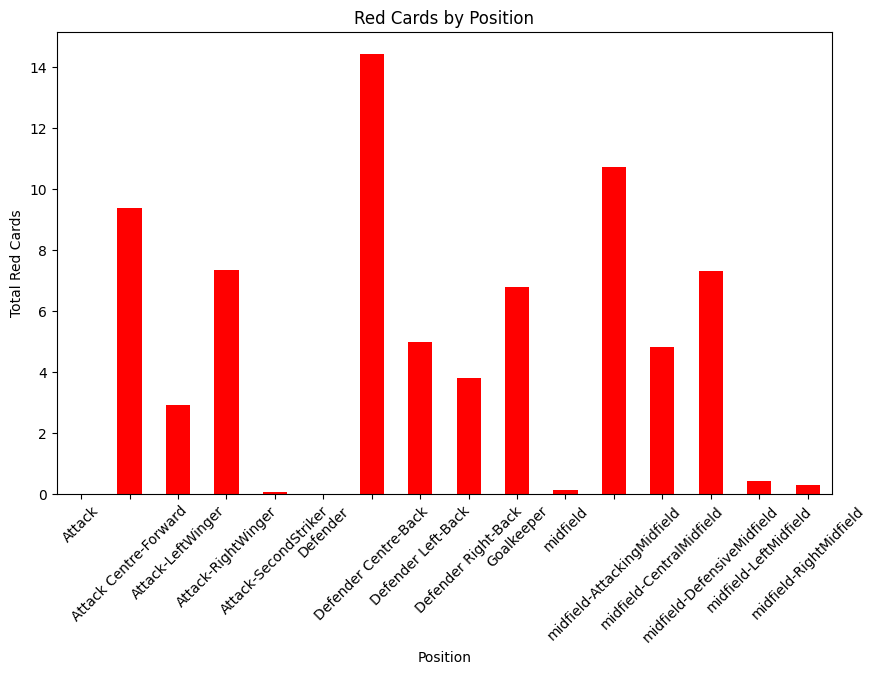

In [1060]:
plt.figure(figsize=(10, 6))
position_red_cards = football.groupby("position")["red cards"].sum()
position_red_cards.plot(kind="bar", color="red")
plt.xlabel("Position")
plt.ylabel("Total Red Cards")
plt.title("Red Cards by Position")
plt.xticks(rotation=45)
plt.show()


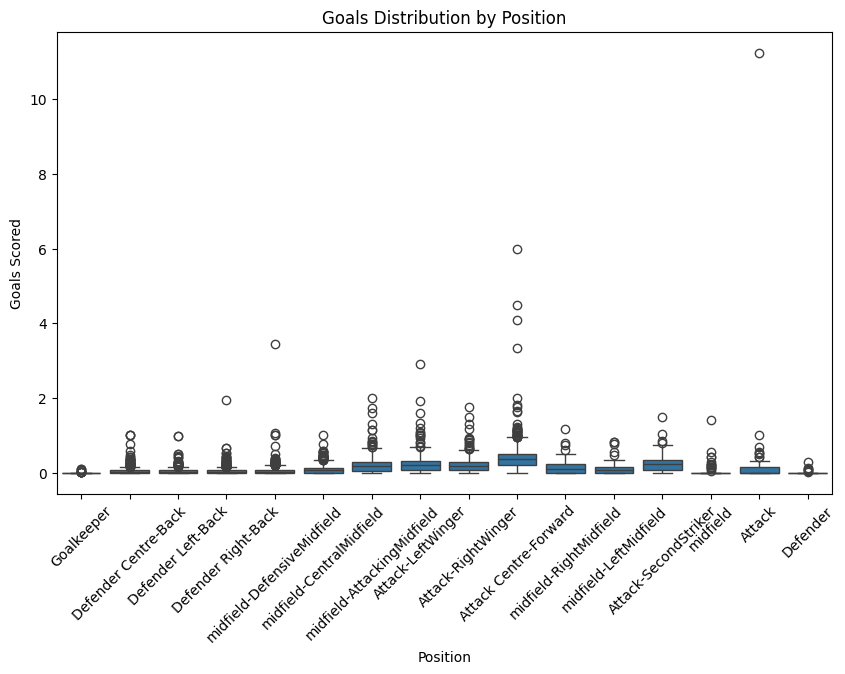

In [1061]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="position", y="goals", data=football)
plt.xlabel("Position")
plt.ylabel("Goals Scored")
plt.title("Goals Distribution by Position")
plt.xticks(rotation=45)
plt.show()


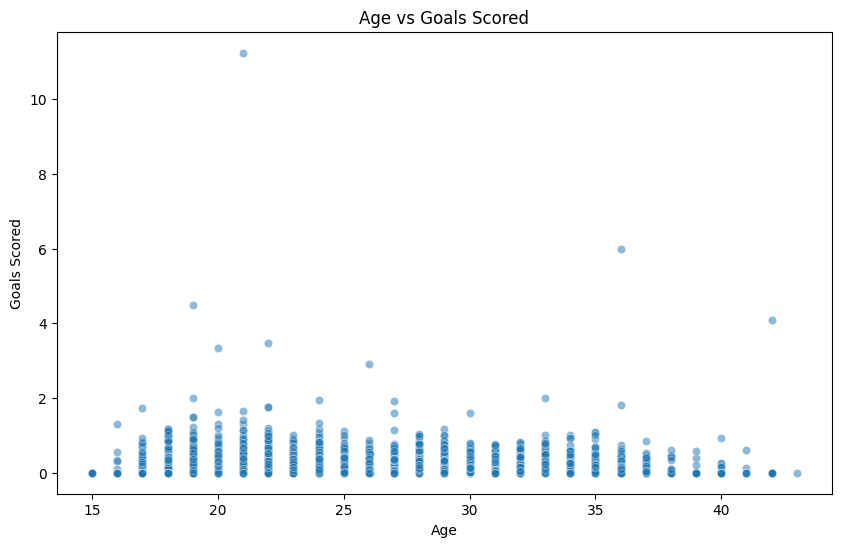

In [1062]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=football["age"], y=football["goals"], alpha=0.5)
plt.xlabel("Age")
plt.ylabel("Goals Scored")
plt.title("Age vs Goals Scored")
plt.show()


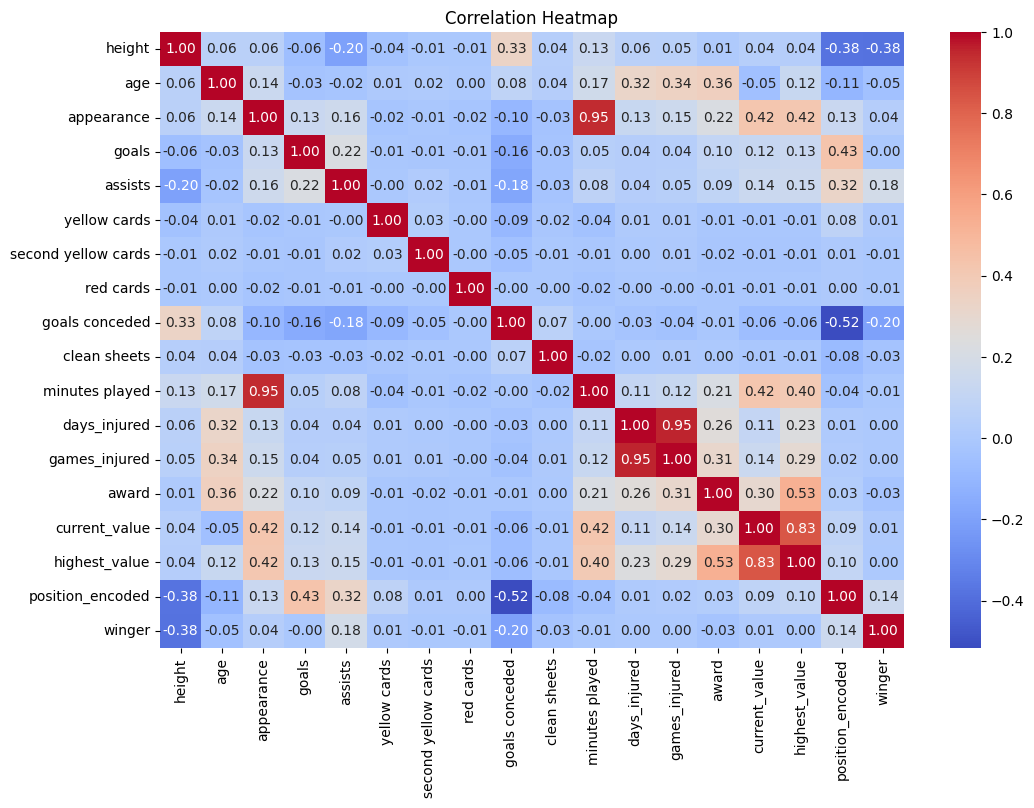

In [1063]:

numeric_df = football.select_dtypes(include=["number"])


plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()



#### 2. Feature engineering

1. Feature scaling
2. Aggregation
3. One hot coding

In [1064]:
football_model.shape

(10754, 20)

In [1065]:
football.current_value

0         15000000
1          1500000
2           600000
3         50000000
4         40000000
5         25000000
6         15000000
7          2000000
8          2000000
9         35000000
10        22000000
11        10000000
12        35000000
13        22000000
14        50000000
15        25000000
16        25000000
17        20000000
18        20000000
19        17000000
20          800000
21          800000
22        75000000
23        80000000
24        55000000
25        25000000
26        25000000
27        70000000
28         3000000
29               0
30        15000000
31        14000000
32         8000000
33         1000000
34        32000000
35        28000000
36        18000000
37         1000000
38        12000000
39         2500000
40        12000000
41         9000000
42        80000000
43        35000000
44         8000000
45        45000000
46        25000000
47         8000000
48        22000000
49        15000000
50        38000000
51        27000000
52        16

In [1066]:
categorical_features

['team', 'position']

In [1067]:
# one hot coding
football_model = pd.get_dummies(football_model, columns=categorical_features)

In [1068]:
football_model.shape

(10754, 408)

In [1069]:
football_model.head(2)

height   age  appearance  goals  assists  yellow cards  \
0   189.0  32.0         104    0.0      0.0      0.009585   
1   196.0  30.0          15    0.0      0.0      0.069018   

   second yellow cards  red cards  goals conceded  clean sheets  \
0                  0.0        0.0        1.217252      0.335463   
1                  0.0        0.0        1.242331      0.207055   

   minutes played  days_injured  games_injured  award  current_value  \
0            9390            42              5     13       15000000   
1            1304           510             58      1        1500000   

   highest_value  position_encoded  winger  team_1.FC Köln  \
0       70000000                 1       0           False   
1       22000000                 1       0           False   

   team_1.FC Union Berlin  team_1.FSV Mainz 05  team_AA Argentinos Juniors  \
0                   False                False                       False   
1                   False                False                       False   

   team_AC Ajaccio  team_AC Milan  team_AC Monza  team_ACF Fiorentina  \
0            False          False          False                False   
1            False          False          False                False   

   team_AFC Bournemouth  team_AJ Auxerre  team_AS Monaco  team_AS Roma  \
0                 False            False           False         False   
1                 False            False           False         False   

   team_AZ Alkmaar  team_Abha Club  team_Adana Demirspor  \
0            False           False                 False   
1            False           False                 False   

   team_Adelaide United  team_Ajax Amsterdam  team_Akhmat Grozny  \
0                 False                False               False   
1                 False                False               False   

   team_Al-Adalah FC  team_Al-Batin FC  team_Al-Fateh SC  team_Al-Fayha FC  \
0              False             False             False             False   
1              False             False             False             False   

   team_Al-Hilal Saudi FC  team_Al-Ittihad Club (Jeddah)  team_Al-Khaleej  \
0                   False                          False            False   
1                   False                          False            False   

   team_Al-Nassr FC  team_Al-Raed SFC  team_Al-Shabab Club (Riyadh)  \
0             False             False                         False   
1             False             False                         False   

   team_Al-Taawoun FC  team_Al-Tai  team_Al-Wehda FC  team_Alanyaspor  \
0               False        False             False            False   
1               False        False             False            False   

   team_Albirex Niigata  team_AmaZulu FC  team_América Futebol Clube (MG)  \
0                 False            False                            False   
1                 False            False                            False   

   team_Angers SCO  team_Antalyaspor  team_Arsenal FC  \
0            False             False            False   
1            False             False            False   

   team_Arsenal Fútbol Club  team_Aston Villa  team_Atalanta BC  \
0                     False             False             False   
1                     False             False             False   

   team_Athletic Bilbao  team_Atlanta United FC  team_Atlas Guadalajara  \
0                 False                   False                   False   
1                 False                   False                   False   

   team_Atlético de Madrid  team_Atlético de San Luis  team_Austin FC  \
0                    False                      False           False   
1                    False                      False           False   

   team_Austria Vienna  team_Avispa Fukuoka  team_Basaksehir FK  \
0                False                False               False   
1                False                False               Fals

Logistic Regression

In [1070]:
# Calculate the 35th and 75th percentiles of the current_value
p20 = football['current_value'].quantile(0.20)
p80 = football['current_value'].quantile(0.80)

# Function to categorize prices
def categorize_price(price):
    if price < p20:
        return 'Cheap_value'
    elif price < p80:
        return 'Good_value'
    else:
        return 'High_value'

# Apply the function to create a new column
football['current_value_category'] = football['current_value'].apply(categorize_price)

football.drop('current_value', axis=1, inplace=True)

# Verify the distribution of the new categories
print(football['current_value_category'].value_counts())

current_value_category
Good_value     6621
High_value     2336
Cheap_value    1797
Name: count, dtype: int64


In [1071]:
p25, p85

(np.float64(300000.0), np.float64(5000000.0))

In [1072]:
football['current_value_category']

0         High_value
1         Good_value
2         Good_value
3         High_value
4         High_value
5         High_value
6         High_value
7         Good_value
8         Good_value
9         High_value
10        High_value
11        High_value
12        High_value
13        High_value
14        High_value
15        High_value
16        High_value
17        High_value
18        High_value
19        High_value
20        Good_value
21        Good_value
22        High_value
23        High_value
24        High_value
25        High_value
26        High_value
27        High_value
28        Good_value
29       Cheap_value
30        High_value
31        High_value
32        High_value
33        Good_value
34        High_value
35        High_value
36        High_value
37        Good_value
38        High_value
39        Good_value
40        High_value
41        High_value
42        High_value
43        High_value
44        High_value
45        High_value
46        High_value
47        Hig

In [1073]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
football['current_value_category_encoded'] = encoder.fit_transform(football['current_value_category'])  

#### 3. Feature selection

In [1074]:
correlation = football.corr(numeric_only=True)
print(correlation['current_value_category_encoded'].sort_values(ascending=False))

current_value_category_encoded    1.000000
appearance                        0.541998
minutes played                    0.513437
highest_value                     0.492392
award                             0.244125
games_injured                     0.228707
days_injured                      0.202574
assists                           0.158349
goals                             0.122943
position_encoded                  0.119404
age                               0.069168
height                            0.040540
winger                            0.035628
yellow cards                      0.018448
second yellow cards               0.003844
red cards                        -0.000443
clean sheets                     -0.017341
goals conceded                   -0.112124
Name: current_value_category_encoded, dtype: float64


In [1075]:
# Set the correlation threshold
threshold = 0.2  # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['current_value_category_encoded']) > \
threshold]['current_value_category_encoded'].index


In [1076]:
selected_features

Index(['appearance', 'minutes played', 'days_injured', 'games_injured',
       'award', 'highest_value', 'current_value_category_encoded'],
      dtype='object')

In [1077]:
selected_features = ['appearance', 'minutes played', 'highest_value']

In [1078]:
football = football[selected_features]
football.head()

appearance  minutes played  highest_value
0         104            9390       70000000
1          15            1304       22000000
2           4             292        6000000
3          82            6408       50000000
4          63            5031       80000000

#### 4. Prepare train and test data

In [1079]:

# Prepare data
X = football


# sacle the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [1080]:
X.shape

(10754, 3)

## Buliding the Model

In [1081]:
wcss = []
for i in range(1, 30):  # Test 1 to 10 clusters
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=100,
                    n_init=15,
                    random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS


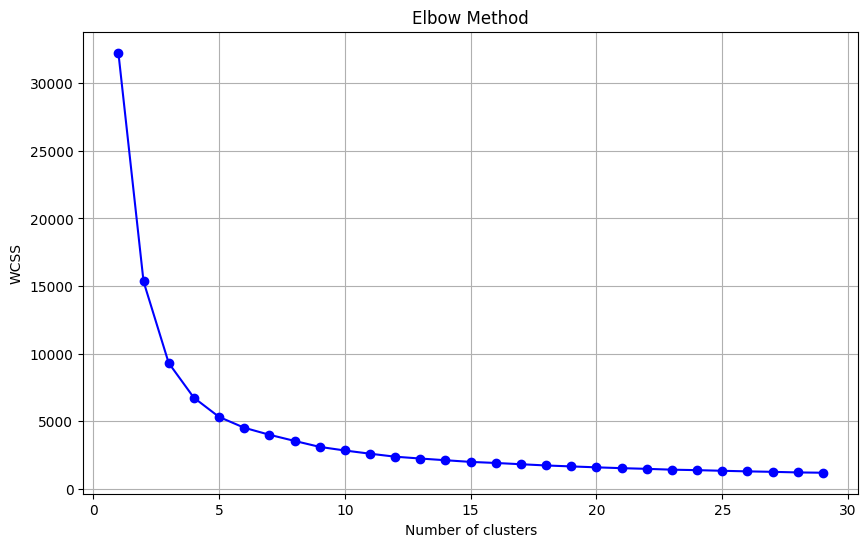

In [1082]:
# 3. Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 30), wcss,  marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [1083]:
# Optional: Apply k-Means using the optimal number of clusters
optimal_clusters = 3  # This might change based on your actual elbow curve analysis
model = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=100, n_init=15, random_state=42)

## Train the Model

In [1084]:
# Fit the model on the training data
y_pred = model.fit_predict(X_scaled)

## Evaluating the Model 

In [1085]:
X.head(2)

appearance  minutes played  highest_value
0         104            9390       70000000
1          15            1304       22000000

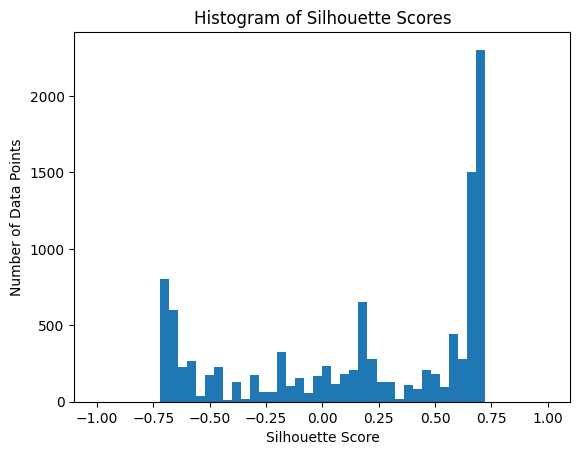

Silhouette average score: 0.18179845273340897


In [1086]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Calculate Silhouette scores for each data point
silhouette_scores = silhouette_samples(X, y_pred)

# Calculate Silhouette average score
silhouette_avg = silhouette_score(X, y_pred)

# Plot Silhouette scores
plt.hist(silhouette_scores, bins=50, range=(-1, 1))
plt.title('Histogram of Silhouette Scores')
plt.xlabel('Silhouette Score')
plt.ylabel('Number of Data Points')
plt.show()

print(f'Silhouette average score: {silhouette_avg}')

In [1087]:
silhouette_scores

array([ 0.58551697, -0.18813828,  0.08469025, ...,  0.67797275,
        0.67797355,  0.67560801])

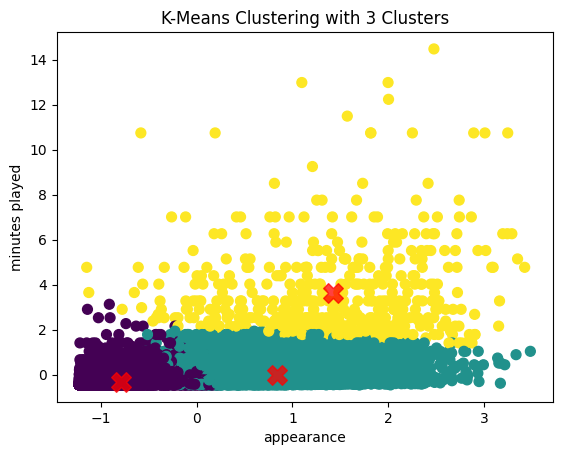

In [1088]:
# Plotting the clusters with optimal number
plt.scatter(X_scaled[:, 1], X_scaled[:, 2], c=y_pred, s=50, cmap='viridis')

centers = model.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='red', s=200, alpha=0.75, marker='X')
plt.title(f'K-Means Clustering with {optimal_clusters} Clusters')
plt.xlabel('appearance')
plt.ylabel('minutes played')
plt.show()

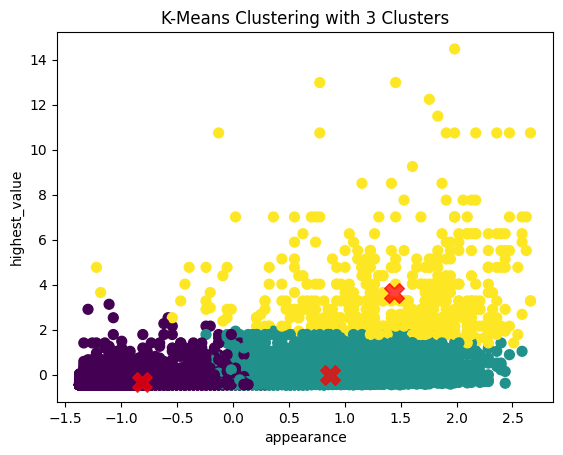

In [1089]:
# Plotting the clusters with optimal number
plt.scatter(X_scaled[:, 0], X_scaled[:, 2], c=y_pred, s=50, cmap='viridis')

centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 2], c='red', s=200, alpha=0.75, marker='X')
plt.title(f'K-Means Clustering with {optimal_clusters} Clusters')
plt.xlabel('appearance')
plt.ylabel('highest_value')
plt.show()

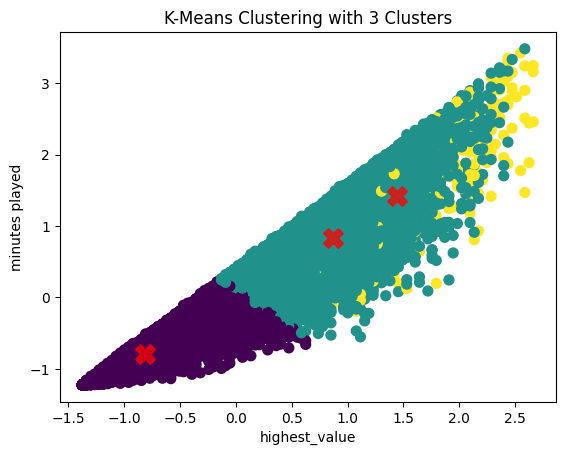

In [1090]:
# Plotting the clusters with optimal number
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred, s=50, cmap='viridis')

centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title(f'K-Means Clustering with {optimal_clusters} Clusters')
plt.xlabel('highest_value')
plt.ylabel('minutes played')
plt.show()

In [1091]:
X['classfication'] = y_pred

In [1092]:
X['classfication'].value_counts()

classfication
0    5723
1    4535
2     496
Name: count, dtype: int64

In [1093]:
classZero=X[X['classfication']==0]
pd.set_option('display.max_rows', None)
classZero.max()

appearance              53
minutes played        2910
highest_value     48000000
classfication            0
dtype: int64

In [1094]:
classZero=X[X['classfication']==0]
pd.set_option('display.max_rows', None)
classZero.min()

appearance        0
minutes played    0
highest_value     0
classfication     0
dtype: int64

In [1095]:
classOne=X[X['classfication']==1]
pd.set_option('display.max_rows', None)
classOne.max()

appearance             105
minutes played        9510
highest_value     32000000
classfication            1
dtype: int64

In [1096]:
classOne=X[X['classfication']==1]
pd.set_option('display.max_rows', None)
classOne.min()

appearance          30
minutes played    1356
highest_value        0
classfication        1
dtype: int64

In [1097]:
classTwo=X[X['classfication']== 2]
pd.set_option('display.max_rows', None)
classTwo.max()

appearance              107
minutes played         9390
highest_value     200000000
classfication             2
dtype: int64

In [1098]:
classTwo=X[X['classfication']== 2]
pd.set_option('display.max_rows', None)
classTwo.min()

appearance               4
minutes played         153
highest_value     25000000
classfication            2
dtype: int64

<Axes: xlabel='highest_value', ylabel='appearance'>

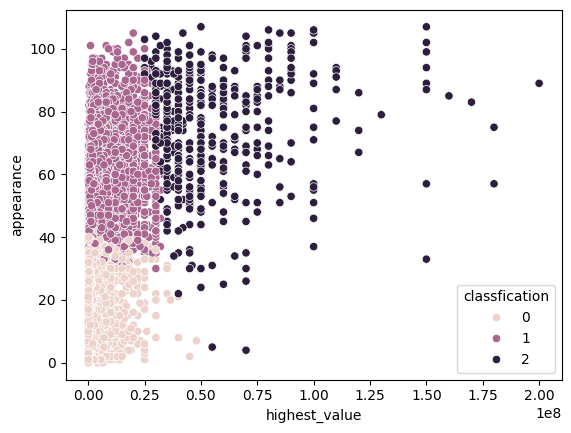

In [1099]:
sns.scatterplot(data = X , x = 'highest_value', y = 'appearance', hue = 'classfication')

<Axes: xlabel='highest_value', ylabel='minutes played'>

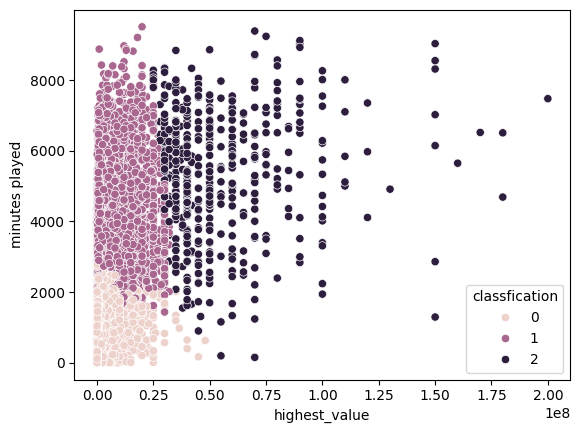

In [1100]:
sns.scatterplot(data = X , x = 'highest_value', y = 'minutes played', hue = 'classfication')

In [1101]:
import plotly
import plotly.express as px

fig = px.scatter_3d(X, x='highest_value', y='minutes played', z='appearance',
              color='classfication')
fig.show()

After looking at the charts and exploring some rows of data for each class, I noticed a clear pattern in how the players are grouped.

**Cluster 0** has players with low to moderate appearances, minutes played, and market value. Many of them are either young, reserves, or have limited playing time. 

I think it makes sense to call this group **Developing Talents** because they seem to be players with potential who are still growing.

**Cluster 1** includes players who are consistent and reliable. They have a solid number of appearances and minutes played, and while they may not be the star players, they seem to form the core of the team. 
I think like **Team Pillars** is a fitting name for this group because they appear to be the foundation that holds the team together.

**Cluster 2** stands out with players who have high appearances, minutes played, and market value. These are clearly the top performers and star players. 

I think **Elite Stars** is a great name for this group because they represent the best of the best in the dataset.

In [1102]:
# Define the mapping
class_names = {0: 'Developing_Talents', 1: 'Team_Pillars', 2: 'Elite_Stars'}

# Replace the numeric classification with names
X['classfication'] = X['classfication'].map(class_names)

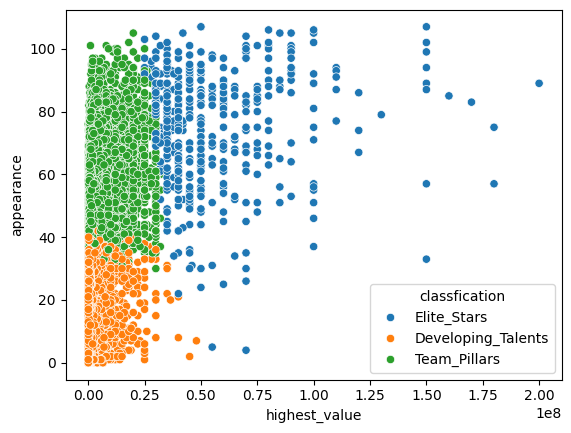

In [1103]:
# Plot with updated names
sns.scatterplot(data=X, x='highest_value', y='appearance', hue='classfication')
plt.show()
